In [36]:
%load_ext autoreload
%autoreload 2

from astropy.io import ascii
import sys
sys.path.append('/global/homes/l/lbigwood/S4Mock/')
from corr_func_tools import calc_wtheta, create_axes
import S4Mock_io
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table,vstack
import glob
import astropy.io.fits as fits
nbins=30

from   desitarget.sv3.sv3_targetmask import desi_mask, bgs_mask, mws_mask

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
l = S4Mock_io.read_mock_ledger()

In [47]:
l

RA,DEC,PARALLAX,PMRA,PMDEC,REF_EPOCH,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,PRIORITY,NUMOBS,NUMOBS_MORE,Z,ZWARN,TIMESTAMP,VERSION,TARGET_STATE,ZTILEID,SV3_SCND_TARGET
deg,deg,mas,mas / yr,mas / yr,yr,,,,,,,,,,,,,,s,,,,
float64,float64,float32,float32,float32,float32,int64,int64,int64,int64,float64,int32,int64,int64,int64,int64,int64,float64,int64,str19,str13,str30,int32,int64
196.0612030029297,25.66085433959961,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230387023347712,0.32515679258074304,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
196.1320037841797,25.398216247558594,0.0,0.0,0.0,0.0,1152921504606846976,257,0,288230387023347713,0.18219466283623775,516,102000,3,102000,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
196.4180908203125,25.150667190551758,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230387023347714,0.030273891124486862,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
196.2181396484375,25.283815383911133,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230387023347715,0.05892080781589293,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
195.93507385253906,25.690887451171875,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230387023347716,0.48902892884342875,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
196.0415496826172,25.42848014831543,0.0,0.0,0.0,0.0,1152921504606846976,257,0,288230387023347717,0.8212185200174456,516,102000,3,102000,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
196.09890747070312,25.421741485595703,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230387023347718,0.1482139904727361,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
195.9995574951172,25.56077003479004,0.0,0.0,0.0,0.0,1152921504606846976,257,0,288230387023347719,0.6519074179634663,516,102000,3,102000,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0


In [28]:
b = l[((l['SV3_BGS_TARGET'] & bgs_mask['BGS_BRIGHT']) != 0)][0]
f = l[((l['SV3_BGS_TARGET'] & bgs_mask['BGS_FAINT']) != 0)][0]
fh = l[((l['SV3_BGS_TARGET'] & bgs_mask['BGS_FAINT_HIP']) != 0)][0]



In [29]:
table = vstack([b,f,fh])


In [44]:
ds = table['SUBPRIORITY','PRIORITY_INIT','NUMOBS_INIT','PRIORITY','NUMOBS','NUMOBS_MORE','Z','TARGET_STATE']

ascii.write(ds, format='latex',overwrite='False')

\begin{table}
\begin{tabular}{cccccccc}
SUBPRIORITY & PRIORITY_INIT & NUMOBS_INIT & PRIORITY & NUMOBS & NUMOBS_MORE & Z & TARGET_STATE \\
0.32515679258074304 & 102100 & 3 & 102100 & 0 & 3 & -1.0 & BGS|UNOBS \\
0.18219466283623775 & 102000 & 3 & 102000 & 0 & 3 & -1.0 & BGS|UNOBS \\
0.6038605225185756 & 102100 & 3 & 102100 & 0 & 3 & -1.0 & BGS|UNOBS \\
\end{tabular}
\end{table}


In [34]:
table.remove_columns(['PARALLAX', 'PMRA', 'PMDEC','REF_EPOCH','OBSCONDITIONS','ZWARN','TIMESTAMP','VERSION','ZTILEID','SV3_SCND_TARGET'])

In [37]:

ascii.write(table, format='latex',overwrite='False') 

\begin{table}
\begin{tabular}{cccccccccccccc}
RA & DEC & SV3_DESI_TARGET & SV3_BGS_TARGET & SV3_MWS_TARGET & TARGETID & SUBPRIORITY & PRIORITY_INIT & NUMOBS_INIT & PRIORITY & NUMOBS & NUMOBS_MORE & Z & TARGET_STATE \\
$\mathrm{{}^{\circ}}$ & $\mathrm{{}^{\circ}}$ &  &  &  &  &  &  &  &  &  &  &  &  \\
196.0612030029297 & 25.66085433959961 & 1152921504606846976 & 514 & 0 & 288230387023347712 & 0.32515679258074304 & 102100 & 3 & 102100 & 0 & 3 & -1.0 & BGS|UNOBS \\
196.1320037841797 & 25.398216247558594 & 1152921504606846976 & 257 & 0 & 288230387023347713 & 0.18219466283623775 & 102000 & 3 & 102000 & 0 & 3 & -1.0 & BGS|UNOBS \\
196.37550354003906 & 25.263858795166016 & 1152921504606846976 & 265 & 0 & 288230387023347721 & 0.6038605225185756 & 102100 & 3 & 102100 & 0 & 3 & -1.0 & BGS|UNOBS \\
\end{tabular}
\end{table}


In [45]:
l

RA,DEC,PARALLAX,PMRA,PMDEC,REF_EPOCH,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,PRIORITY,NUMOBS,NUMOBS_MORE,Z,ZWARN,TIMESTAMP,VERSION,TARGET_STATE,ZTILEID,SV3_SCND_TARGET
deg,deg,mas,mas / yr,mas / yr,yr,,,,,,,,,,,,,,s,,,,
float64,float64,float32,float32,float32,float32,int64,int64,int64,int64,float64,int32,int64,int64,int64,int64,int64,float64,int64,str19,str6,str9,int32,int64
196.0612030029297,25.66085433959961,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230387023347712,0.32515679258074304,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
196.1320037841797,25.398216247558594,0.0,0.0,0.0,0.0,1152921504606846976,257,0,288230387023347713,0.18219466283623775,516,102000,3,102000,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
196.4180908203125,25.150667190551758,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230387023347714,0.030273891124486862,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
196.2181396484375,25.283815383911133,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230387023347715,0.05892080781589293,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
195.93507385253906,25.690887451171875,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230387023347716,0.48902892884342875,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
196.0415496826172,25.42848014831543,0.0,0.0,0.0,0.0,1152921504606846976,257,0,288230387023347717,0.8212185200174456,516,102000,3,102000,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
196.09890747070312,25.421741485595703,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230387023347718,0.1482139904727361,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
195.9995574951172,25.56077003479004,0.0,0.0,0.0,0.0,1152921504606846976,257,0,288230387023347719,0.6519074179634663,516,102000,3,102000,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0


In [5]:
x= S4Mock_io.read_mainsurvey_ledgers()

Runtime of 0.071213 seconds after 0 pixels
Runtime of 6.019549 seconds after 100 pixels
Runtime of 14.281422 seconds after 200 pixels
Runtime of 21.490077 seconds after 300 pixels
Runtime of 30.227762 seconds after 400 pixels
Runtime of 38.090956 seconds after 500 pixels
Runtime of 45.022174 seconds after 600 pixels
Runtime of 52.508335 seconds after 700 pixels
Runtime of 61.410758 seconds after 800 pixels
Runtime of 68.109983 seconds after 900 pixels
Runtime of 75.336097 seconds after 1000 pixels
Runtime of 82.340080 seconds after 1100 pixels
Runtime of 91.555459 seconds after 1200 pixels
Runtime of 101.045846 seconds after 1300 pixels
Runtime of 111.290523 seconds after 1400 pixels
Runtime of 118.582302 seconds after 1500 pixels
Runtime of 127.107936 seconds after 1600 pixels
Runtime of 135.262547 seconds after 1700 pixels
Runtime of 143.276531 seconds after 1800 pixels
Runtime of 150.173275 seconds after 1900 pixels
Runtime of 159.105265 seconds after 2000 pixels
Runtime of 167.5880

In [6]:
x

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,SCND_TARGET,NUMOBS_MORE,NUMOBS,Z,ZWARN,ZTILEID,Z_QN,IS_QSO_QN,DELTACHI2,TARGET_STATE,TIMESTAMP,VERSION,PRIORITY
float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,float64,int64,int64,float64,int64,float64,str16,str25,str5,int64
59.60086559409994,-68.12683131313392,0.0,0.0,0.0,0.0,39626498281308189,1152921504606846976,131074,0,0.2085393333137383,516,2100,2,0,2,0,-1.0,-1,-1,-1.0,-1,-1.0,BGS_BRIGHT|UNOBS,2021-05-13T08:15:37+00:00,1.1.1,2100
60.00983139575825,-68.16966639837612,0.0,0.0,0.0,0.0,39626498281308607,1152921504606846976,131074,0,0.024925504385559738,516,2100,2,0,2,0,-1.0,-1,-1,-1.0,-1,-1.0,BGS_BRIGHT|UNOBS,2021-05-13T08:15:37+00:00,1.1.1,2100
60.01124019929327,-68.16379040745758,0.0,0.0,0.0,0.0,39626498281308610,5764607523034234880,131074,0,0.5879754509121197,575,2100,2,131072,2,0,-1.0,-1,-1,-1.0,-1,-1.0,BGS_BRIGHT|UNOBS,2021-05-13T08:15:37+00:00,1.1.1,2100
60.067316634746724,-68.1403940503445,0.0,0.0,0.0,0.0,39626498281308675,1152921504606846976,131074,0,0.14655963849075593,516,2100,2,0,2,0,-1.0,-1,-1,-1.0,-1,-1.0,BGS_BRIGHT|UNOBS,2021-05-13T08:15:37+00:00,1.1.1,2100
60.27687723658043,-68.1477166136955,0.0,0.0,0.0,0.0,39626498285502547,1152921504606846976,131074,0,0.5968644826507952,516,2100,2,0,2,0,-1.0,-1,-1,-1.0,-1,-1.0,BGS_BRIGHT|UNOBS,2021-05-13T08:15:37+00:00,1.1.1,2100
60.351730827700045,-68.1384524183673,0.0,0.0,0.0,0.0,39626498285502613,1152921504606846976,131074,0,0.3251615652075673,516,2100,2,0,2,0,-1.0,-1,-1,-1.0,-1,-1.0,BGS_BRIGHT|UNOBS,2021-05-13T08:15:37+00:00,1.1.1,2100
60.35480903565853,-68.15736062454609,0.0,0.0,0.0,0.0,39626498285502619,1152921504606846976,131074,0,0.9714658296060088,516,2100,2,0,2,0,-1.0,-1,-1,-1.0,-1,-1.0,BGS_BRIGHT|UNOBS,2021-05-13T08:15:37+00:00,1.1.1,2100
60.41502834204189,-68.14758441322456,0.0,0.0,0.0,0.0,39626498285502711,1152921504606912513,131074,0,0.98602725407379,517,2100,2,0,2,0,-1.0,-1,-1,-1.0,-1,-1.0,BGS_BRIGHT|UNOBS,2021-05-13T08:15:37+00:00,1.1.1,2100
60.57191230896668,-68.15293728255374,0.0,0.0,0.0,0.0,39626498285502939,1152921504606846976,131074,0,0.2485029442343407,516,2100,2,0,2,0,-1.0,-1,-1,-1.0,-1,-1.0,BGS_BRIGHT|UNOBS,2021-05-13T08:15:37+00:00,1.1.1,2100


In [20]:
#mock_all with error bars 

wtheta_all = np.load('/global/u2/l/lbigwood/S4Mock/docs/nb/wtheta_all.npy')
mean = np.mean(wtheta_all,axis=0)
stdev = np.std(wtheta_all,axis=0)

In [21]:
#real all 
targ = S4Mock_io.read_mainsurvey_targets_bright()

targ = targ[(targ['PHOTSYS']=='S')]
targ_small = targ[((targ['RA']>180) & (targ['RA']<190) & (targ['DEC']>0) & (targ['DEC']<10))]

targ_ran = S4Mock_io.read_desitargetrandoms()

targ_ran_small = targ_ran[((targ_ran['RA']>180) & (targ_ran['RA']<190) & (targ_ran['DEC']>0) & (targ_ran['DEC']<10))]

targ_wtheta =  calc_wtheta(targ_small['RA'],targ_small['DEC'],targ_ran_small['RA'],targ_ran_small['DEC'],nbins=nbins)

Runtime of 0.102564 seconds after 0 pixels
Runtime of 3.788000 seconds after 20 pixels
Runtime of 6.776444 seconds after 40 pixels
Runtime of 10.016521 seconds after 60 pixels
Runtime of 12.732425 seconds after 80 pixels
Runtime of 15.920209 seconds after 100 pixels
Runtime of 20.343096 seconds after 120 pixels
Runtime of 22.526894 seconds after 140 pixels
Runtime of 24.959868 seconds after 160 pixels
Runtime of 27.872091 seconds after 180 pixels
Runtime of 31.368930 seconds after 200 pixels
Runtime of 34.128889 seconds after 220 pixels
Runtime of 35.541013 seconds after 240 pixels
Runtime of 37.907351 seconds after 260 pixels
Runtime of 40.362347 seconds after 280 pixels
Runtime of 44.665461 seconds after 300 pixels
Runtime of 47.866848 seconds after 320 pixels
Runtime of 50.743607 seconds after 340 pixels
Runtime of 52.929385 seconds after 360 pixels
Runtime of 54.805866 seconds after 380 pixels
Runtime of 56.877705 seconds after 400 pixels
Runtime of 59.881376 seconds after 420 pixe

In [5]:
#this is main survey area 
#np.save('wtheta_main',wtheta_main)
#wtheta_main = np.load('/global/u2/l/lbigwood/S4Mock/docs/nb/wtheta_main.npy')

In [24]:
#mock fba files 
fassign = S4Mock_io.read_fassign_mock()
init_ledger = S4Mock_io.read_init_ledger()
fassign = fassign[np.in1d(fassign['TARGETID'],init_ledger['TARGETID'])]

sv3_rand = S4Mock_io.read_sv3_randoms(number=1)

wtheta_mock_fba = calc_wtheta(fassign['TARGET_RA'],fassign['TARGET_DEC'],sv3_rand['RA'],sv3_rand['DEC'])

In [25]:
#real fba files 

x = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/BGS_BRIGHT_full.dat.fits')
dat = x[1].data
dat = dat[(dat['FIBERASSIGN_X']<1e20)]

x = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/BGS_BRIGHT_0_full.ran.fits')
ran = x[1].data 

fba_wtheta = calc_wtheta(dat['RA'],dat['DEC'],ran['RA'],ran['DEC'],nbins=nbins)

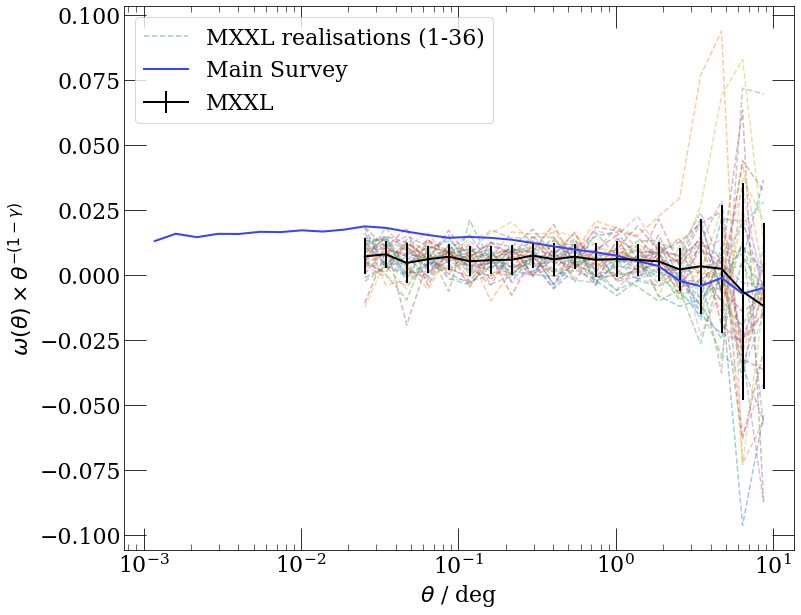

In [26]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)


#mxxl all

x_axis1,y_axis1 = create_axes(wtheta_all[0])
plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed',label='MXXL realisations (1-36)')


for i in range(1,len(wtheta_all)):
    x_axis1,y_axis1 = create_axes(wtheta_all[i])
    plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed')

    
x_axis1,y_axis1 = create_axes(mean)
x_axis1,y_axis_err = create_axes(stdev)

plt.errorbar(x_axis1[10:],y_axis1[10:],yerr=y_axis_err[10:],color= 'black',label='MXXL',zorder=3,linewidth=2)


#real all
x_axis,y_axis = create_axes(targ_wtheta)

plt.plot(x_axis,y_axis,color= '#3742fa',label='Main Survey',zorder=3,linewidth=2)


plt.ylabel(r'$\omega (\theta)\times \theta^{-(1-\gamma)}$')
plt.xlabel(r'$\theta$ / deg')
plt.xscale('log')
plt.legend()

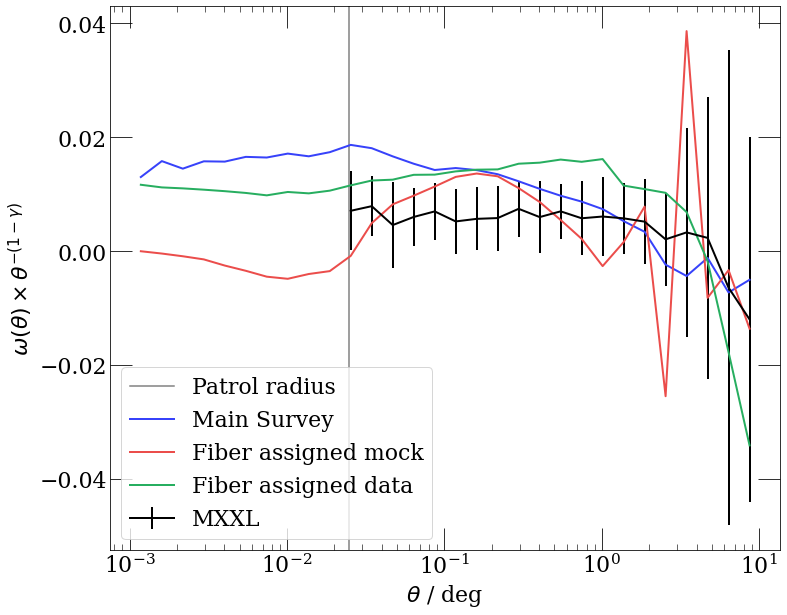

In [27]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

patrol_radii  = 1.48/60
plt.axvline(x=patrol_radii,color='grey',label='Patrol radius')

#mxxl all 
x_axis1,y_axis1 = create_axes(mean)
x_axis1,y_axis_err = create_axes(stdev)

plt.errorbar(x_axis1[10:],y_axis1[10:],yerr=y_axis_err[10:],color= 'black',label='MXXL',zorder=3,linewidth=2)


#real all
x_axis,y_axis = create_axes(targ_wtheta)

plt.plot(x_axis,y_axis,color= '#3742fa',label='Main Survey',zorder=3,linewidth=2)

#mock fba 
x_axis_fba,y_axis_fba = create_axes(wtheta_mock_fba)

plt.plot(x_axis_fba,y_axis_fba,color= '#eb4d4b',label='Fiber assigned mock',zorder=3,linewidth=2)

#real fba 
x_axis_fba,y_axis_fba = create_axes(fba_wtheta)

plt.plot(x_axis_fba,y_axis_fba,color= '#27ae60',label='Fiber assigned data',zorder=3,linewidth=2)


plt.ylabel(r'$\omega (\theta)\times \theta^{-(1-\gamma)}$')
plt.xlabel(r'$\theta$ / deg')
plt.xscale('log')
plt.legend()

<Figure size 864x720 with 0 Axes>

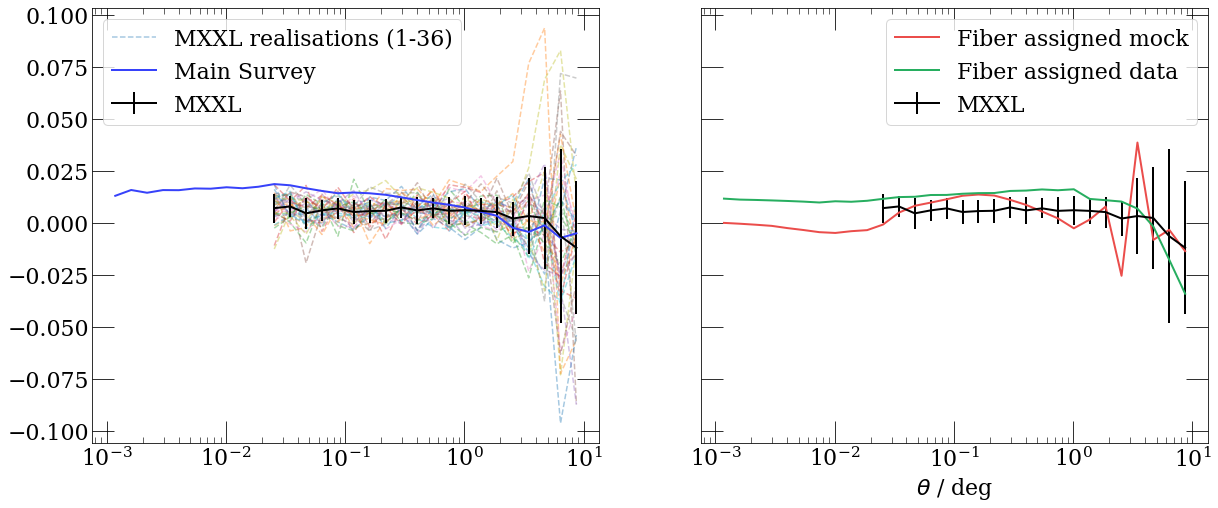

In [28]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8),sharex=True,sharey=True)

x_axis1,y_axis1 = create_axes(wtheta_all[0])
ax1.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed',label='MXXL realisations (1-36)')


for i in range(1,len(wtheta_all)):
    x_axis1,y_axis1 = create_axes(wtheta_all[i])
    ax1.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed')

    
x_axis1,y_axis1 = create_axes(mean)
x_axis1,y_axis_err = create_axes(stdev)

ax1.errorbar(x_axis1[10:],y_axis1[10:],yerr=y_axis_err[10:],color= 'black',label='MXXL',zorder=3,linewidth=2)
ax2.errorbar(x_axis1[10:],y_axis1[10:],yerr=y_axis_err[10:],color= 'black',label='MXXL',zorder=3,linewidth=2)

x_axis,y_axis = create_axes(targ_wtheta)

ax1.plot(x_axis,y_axis,color= '#3742fa',label='Main Survey',zorder=3,linewidth=2)

x_axis_fba,y_axis_fba = create_axes(wtheta_mock_fba)

ax2.plot(x_axis_fba,y_axis_fba,color= '#eb4d4b',label='Fiber assigned mock',zorder=3,linewidth=2)

x_axis_fba,y_axis_fba = create_axes(fba_wtheta)

ax2.plot(x_axis_fba,y_axis_fba,color= '#27ae60',label='Fiber assigned data',zorder=3,linewidth=2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.xlabel(r'$\theta$ / deg')
plt.xscale('log')
ax1.legend()
ax2.legend()